In [4]:
from ucimlrepo import fetch_ucirepo 
from implementations import bayes
from implementations import id3
from implementations import random_forest
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from typing import Tuple
import pandas as pd
import time
import importlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [6]:
wine_quality = fetch_ucirepo(id=186) 
  
X = np.array(wine_quality.data.features)
y = np.array(wine_quality.data.targets.quality) 

def reassign_classes(y: np.ndarray) -> np.ndarray:
    new_y = []
    for current_class in y:
        if current_class > 5:
            new_y.append(1)
        else:
            new_y.append(0)
    return new_y

y = reassign_classes(y)

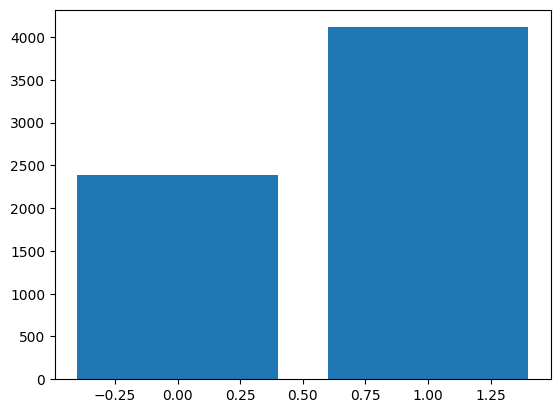

In [7]:
c = Counter()
c.update(y)
plt.bar([x for x in range(2)], c.values())
plt.show()

In [22]:
importlib.reload(random_forest)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
accuracies = []
time1 = time.time()

for _ in range(1):
    y_pred = []
    rfc = random_forest.RandomForestClassifier(classifiers_number=50)
    rfc.fit(x_train, y_train, tree_percentage=1.0)
    
    samples = len(y_test)
    correctly_predicted = 0
    for sample, gt in zip(x_test, y_test):
        prediction = rfc.predict(sample)
        y_pred.append(np.argmax(prediction))
        print(prediction, gt)
        if np.argmax(prediction) == gt:
            correctly_predicted += 1

    y_pred = np.array(y_pred)
    
    print(f"Accuracy: {(correctly_predicted / samples) * 100:.2f}%")
    print(f"Elapsed time: {time.time()-time1:.2f} s")
    accuracies.append((correctly_predicted / samples) * 100)
print(f"Mean accuracy: {np.mean(accuracies):.2f}%")

[0.18 0.82] 1
[0.32 0.68] 0
[0.02 0.98] 1
[0.24 0.76] 1
[0.16 0.84] 1
[0.12 0.88] 1
[0.08 0.92] 1
[0.06 0.94] 1
[0.86 0.14] 0
[0.16 0.84] 1
[0.82 0.18] 1
[0.12 0.88] 1
[0.14 0.86] 1
[0.9 0.1] 0
[0.22 0.78] 1
[0.2 0.8] 1
[0.28 0.72] 0
[0.16 0.84] 1
[0.64 0.36] 0
[0.86 0.14] 0
[0.12 0.88] 1
[0.88 0.12] 0
[0.24 0.76] 0
[0.06 0.94] 1
[0.1 0.9] 1
[0.02 0.98] 1
[0.02 0.98] 1
[0.72 0.28] 0
[0. 1.] 1
[0.02 0.98] 1
[0.92 0.08] 0
[0.06 0.94] 1
[0.2 0.8] 1
[0.34 0.66] 1
[0.48 0.52] 0
[0.22 0.78] 1
[0.28 0.72] 1
[0.36 0.64] 1
[0.2 0.8] 1
[0.5 0.5] 1
[0.28 0.72] 0
[0.02 0.98] 1
[0.78 0.22] 0
[0.04 0.96] 1
[0.16 0.84] 1
[0.78 0.22] 0
[0.42 0.58] 1
[0. 1.] 1
[0.22 0.78] 1
[0.5 0.5] 1
[0.48 0.52] 0
[0.26 0.74] 1
[0.84 0.16] 0
[0.58 0.42] 1
[0.82 0.18] 0
[0.22 0.78] 1
[0.3 0.7] 0
[0.6 0.4] 0
[0.98 0.02] 0
[0.58 0.42] 0
[0.32 0.68] 1
[0.02 0.98] 1
[0.18 0.82] 1
[0.14 0.86] 1
[0.22 0.78] 0
[0.04 0.96] 1
[0.66 0.34] 1
[0.12 0.88] 1
[0.04 0.96] 1
[0.04 0.96] 1
[1. 0.] 0
[0.68 0.32] 0
[0.84 0.16] 1
[0.12 0.

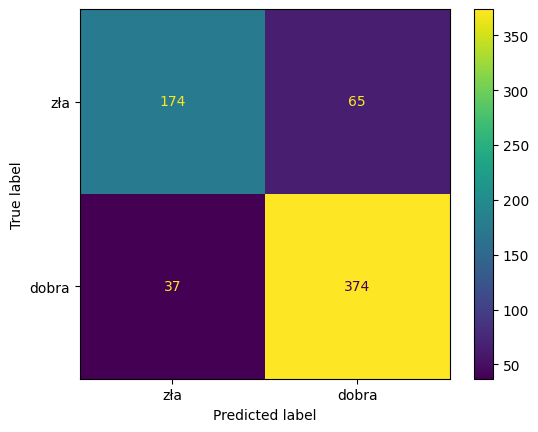

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot()
plt.show()

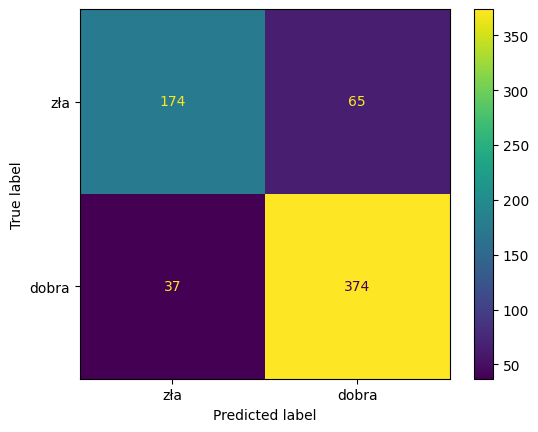

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["zła", "dobra"])
disp.plot()
plt.show()